# **Samuel Vasco Vasco González**  Cc. 1152223665

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
#lybraries
%pylab inline
import pandas as pd
from mpl_toolkits import mplot3d
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from tabulate import tabulate

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Neural_Network_Course/Homework 4/FuelConsumption.csv")
data

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


Este data set contiene el índice de consumo de combustible de modelos específicos y un estimado de las emisiones de Dióxido de carbono para vehículos ligeros nuevos para la venta al por menor en Canadá.

In [4]:
data_extract=data[['CO2EMISSIONS','ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']]
data_extract

,CO2EMISSIONS,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB
0,196,2.0,4,9.9,6.7,8.5
1,221,2.4,4,11.2,7.7,9.6
2,136,1.5,4,6.0,5.8,5.9
3,255,3.5,6,12.7,9.1,11.1
4,244,3.5,6,12.1,8.7,10.6
...,...,...,...,...,...,...
1062,271,3.0,6,13.4,9.8,11.8
1063,264,3.2,6,13.2,9.5,11.5
1064,271,3.0,6,13.4,9.8,11.8
1065,260,3.2,6,12.9,9.3,11.3


Una vez seleccionadas estas características, implementaremos un modelo de regresión lineal que busca predecir las emisiones de CO2 (CO2EMISSIONS) a partir de características o predictores como el tamaño del motor (ENGINESIZE), el número de cilindros (CYLINDERS), consumo de gasolina en la ciudad (FUELCONSUMPTION_CITY), consumo de gasolina en carretera (FUELCONSUMPTION_HWY) y FUELCONSUMPTION_COMB.

# Visualize the data in 2D


Text(0.5, 1.0, 'CO2 EMISSIONS vs CYLINDERS')

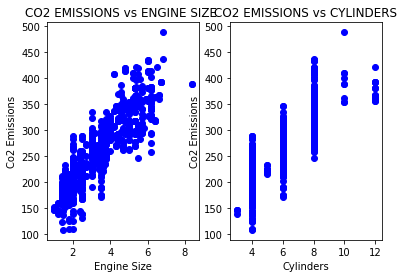

In [5]:
Enginesize=data_extract["ENGINESIZE"].values
Cylinders=data_extract["CYLINDERS"].values
Co2emissions=data_extract["CO2EMISSIONS"].values

fig,axs=plt.subplots(1,2)
fig=figsize(15,8)

axs[0].plot(Enginesize,Co2emissions,"bo")
axs[0].set_xlabel("Engine Size")
axs[0].set_ylabel("Co2 Emissions")
axs[0].set_title("CO2 EMISSIONS vs ENGINE SIZE ")
axs[1].plot(Cylinders,Co2emissions,"bo")
axs[1].set_xlabel("Cylinders")
axs[1].set_ylabel("Co2 Emissions")
axs[1].set_title("CO2 EMISSIONS vs CYLINDERS")

Podemos notar que en ambas gráficas la dispersión de los puntos parecen tener un comportamiento lineal.

# Plot 3D

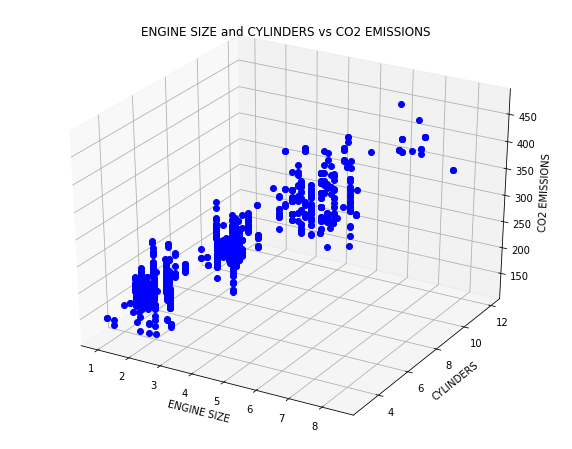

In [6]:
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection ='3d')
 
x = Enginesize
y = Cylinders
z = Co2emissions
ax.plot(x, y, z,"bo") 

ax.set_xlabel('ENGINE SIZE')
ax.set_ylabel('CYLINDERS')
ax.set_zlabel('CO2 EMISSIONS') 
ax.set_title('ENGINE SIZE and CYLINDERS vs CO2 EMISSIONS')
plt.show()

Es posible apreciar que existe un plano al cual se pueden ajustar los puntos.

# Apply feature scaling.

##  It is a step of Data Pre Processing that is applied to independent variables or features of data. It basically helps to normalize the data within a particular range. Sometimes, it also helps in **speeding up the calculations in an algorithm.**

We use Standarscaler, it replace the values with their Z score. 
**Z score** is the number of standard desviations that the values is far away from the mean.

$$Z=\dfrac{x-\mu}{\sigma}$$

In [7]:
# Initialise the Scaler
scaler = StandardScaler()
 
# To scale data
df=scaler.fit_transform(data_extract)
df

array([[-0.95084   , -0.9512918 , -0.99896853, -0.82855772, -0.99334135,
        -0.88430407],
       [-0.55616091, -0.66865251, -0.99896853, -0.5114328 , -0.63532912,
        -0.5685715 ],
       [-1.89806981, -1.30459092, -0.99896853, -1.77993246, -1.31555236,
        -1.63058106],
       ...,
       [ 0.23319727, -0.24469358,  0.11424235,  0.02524013,  0.11649658,
         0.06289365],
       [ 0.05953847, -0.10337393,  0.11424235, -0.09673099, -0.06250954,
        -0.08062116],
       [ 0.59630203, -0.10337393,  0.11424235,  0.3911535 ,  0.25970147,
         0.34992326]])

Now each column of data is scaled to mean $\mu=0$ and standard desviation $\sigma=1$. This values are equivalents to the initials values. The distribution of data stay equal, it is invariant under scale transformation.

In [8]:
#Data without Scaler
#data_scaler=data_extract

#Data with Scaler
data_scaler=pd.DataFrame(df,columns=['CO2EMISSIONS','ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB'])
data_scaler

,CO2EMISSIONS,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB
0,-0.950840,-0.951292,-0.998969,-0.828558,-0.993341,-0.884304
1,-0.556161,-0.668653,-0.998969,-0.511433,-0.635329,-0.568571
2,-1.898070,-1.304591,-0.998969,-1.779932,-1.315552,-1.630581
3,-0.019397,0.108606,0.114242,-0.145519,-0.134112,-0.138027
4,-0.193056,0.108606,0.114242,-0.291885,-0.277317,-0.281542
...,...,...,...,...,...,...
1062,0.233197,-0.244694,0.114242,0.025240,0.116497,0.062894
1063,0.122687,-0.103374,0.114242,-0.023548,0.009093,-0.023215
1064,0.233197,-0.244694,0.114242,0.025240,0.116497,0.062894
1065,0.059538,-0.103374,0.114242,-0.096731,-0.062510,-0.080621


# Split the data into train and test using scikit-learn

In [9]:
# División de los datos en train y test
# ==============================================================================
#Features 
X = data_scaler[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']]
#Target variable
y = data_scaler[['CO2EMISSIONS']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                  random_state=43,shuffle=True)

División de los datos en Train y Test con una distribución del 80% y 20% del total de datos respectivamente.

# Train the Linear Model, Predictions from model and Print the Metrics $R^2$, MAE and MAPE. 

In [10]:
#Modelo
#==============================================================================
linear_regression = LinearRegression()

#Entrenamiento del modelo
# ==============================================================================
linear_regression.fit(X_train,y_train)

# Predicciones test
# ==============================================================================
predicciones = linear_regression.predict(X=X_test)
predicciones = predicciones.flatten()

#Metric R2
# ==============================================================================
R2_Train=linear_regression.score(X_train,y_train)
R2_Test=linear_regression.score(X_test,y_test)

print("The R2 for Train set is: {:.4}".format(R2_Train))
print("The R2 for Test set is: {:.4} \n".format(R2_Test))

#Metric MAE
# ==============================================================================
MAE=mean_absolute_error(y_test,predicciones)

print("Metric MAE is: {:.4} \n".format(MAE))

#Metric MAPE
# ==============================================================================
MAPE=mean_absolute_percentage_error(y_test,predicciones)

print("Metric MAPE is: {:.4} \n".format(MAPE))

The R2 for Train set is: 0.8611
The R2 for Test set is: 0.8708 

Metric MAE is: 0.2691 

Metric MAPE is: 0.742 



El modelo tiene un Score $R^2=0.87$ para Test lo cual resulta bastante bien. 

In [11]:
#Parameters from Linear Model
# ==============================================================================
Coef=linear_regression.coef_.flatten()
Interc=linear_regression.intercept_.flatten()

print("Vector of Coeficients from Linear Regression Model: \n {} \n".format(Coef))
print("Intercept from Linear Regression Model: \n {}".format(Interc))

Vector of Coeficients from Linear Regression Model: 
 [ 0.22747155  0.20902058 -0.63563957 -0.44404269  1.61796971] 

Intercept from Linear Regression Model: 
 [-0.01069005]


# Predict CO2 emission of the 10 randomly chosen cars, compare with the true values

In [12]:

y_test_array=y_test.values.flatten()

#choose 10 randomly cars
random=np.random.randint(len(y_test_array), size=10)
random_True=[]
random_pred=[]
for i in random:
  random_True.append(y_test_array[i])
  random_pred.append(predicciones[i])

dict={"CO2 emission True":random_True, "CO2 emission Predict":random_pred}

print(tabulate(dict, headers='keys', tablefmt='fancy_grid')) 
  

╒═════════════════════╤════════════════════════╕
│   CO2 emission True │   CO2 emission Predict │
╞═════════════════════╪════════════════════════╡
│           0.233197  │              0.106199  │
├─────────────────────┼────────────────────────┤
│          -0.777181  │             -0.840407  │
├─────────────────────┼────────────────────────┤
│           1.48038   │              2.01838   │
├─────────────────────┼────────────────────────┤
│           2.77493   │              1.81257   │
├─────────────────────┼────────────────────────┤
│           0.0595385 │             -0.0817148 │
├─────────────────────┼────────────────────────┤
│          -0.745607  │             -0.841659  │
├─────────────────────┼────────────────────────┤
│           1.00677   │              0.782038  │
├─────────────────────┼────────────────────────┤
│          -1.21922   │             -1.02046   │
├─────────────────────┼────────────────────────┤
│           2.41183   │              1.76707   │
├───────────────────

Notamos que hay valores bastante cercanos entre el predicho y el real, mientras que hay otros bastante lejanos entre el predicho y el real. 

Interpretando el MAE, tenemos que en promedio los datos predichos tienen un error de masomenos 0.2691, es decir, los valores predichos deben interpretarse así: $CO2emission_{pred}\pm MAE = valor$ $predicho \pm 0.2691$. 

Y como en este caso los valores estaban escalados como el número de desviaciones típicas que un valor dado toma con respecto a la media, entonces tenemos un error en el valor predicho bastante significativo.

Esto nos lo confirma el MAPE, pues nos está indicando un error porcentual en la predicción de cada emsion de CO2 del $74.2$%, un error significativamente grande.


In [17]:
#Data without Scaler
data_scaler=data_extract

# División de los datos en train y test
# ==============================================================================
#Features 
X = data_scaler[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']]
#Target variable
y = data_scaler[['CO2EMISSIONS']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                  random_state=43,shuffle=True)

#Modelo
#==============================================================================
linear_regression = LinearRegression()

#Entrenamiento del modelo
# ==============================================================================
linear_regression.fit(X_train,y_train)

# Predicciones test
# ==============================================================================
predicciones = linear_regression.predict(X=X_test)
predicciones = predicciones.flatten()

#Metric R2
# ==============================================================================
R2_Train=linear_regression.score(X_train,y_train)
R2_Test=linear_regression.score(X_test,y_test)

print("The R2 for Train set is: {:.4}".format(R2_Train))
print("The R2 for Test set is: {:.4} \n".format(R2_Test))

#Metric MAE
# ==============================================================================
MAE=mean_absolute_error(y_test,predicciones)

print("Metric MAE is: {:.4} \n".format(MAE))

#Metric MAPE
# ==============================================================================
MAPE=mean_absolute_percentage_error(y_test,predicciones)

print("Metric MAPE is: {:.4} \n".format(MAPE))

#Parameters from Linear Model
# ==============================================================================
Coef=linear_regression.coef_.flatten()
Interc=linear_regression.intercept_.flatten()

print("Vector of Coeficients from Linear Regression Model: \n {} \n".format(Coef))
print("Intercept from Linear Regression Model: \n {}".format(Interc))

y_test_array=y_test.values.flatten()

#choose 10 randomly cars
random=np.random.randint(len(y_test_array), size=10)
random_True=[]
random_pred=[]
for i in random:
  random_True.append(y_test_array[i])
  random_pred.append(predicciones[i])

dict={"CO2 emission True":random_True, "CO2 emission Predict":random_pred}

print(tabulate(dict, headers='keys', tablefmt='fancy_grid')) 

The R2 for Train set is: 0.8611
The R2 for Test set is: 0.8708 

Metric MAE is: 17.05 

Metric MAPE is: 0.06274 

Vector of Coeficients from Linear Regression Model: 
 [ 10.18111912   7.36940432  -9.82186209 -10.06974538  29.41663433] 

Intercept from Linear Regression Model: 
 [64.11160894]
╒═════════════════════╤════════════════════════╕
│   CO2 emission True │   CO2 emission Predict │
╞═════════════════════╪════════════════════════╡
│                 264 │                283.923 │
├─────────────────────┼────────────────────────┤
│                 290 │                299.518 │
├─────────────────────┼────────────────────────┤
│                 230 │                213.601 │
├─────────────────────┼────────────────────────┤
│                 214 │                203.715 │
├─────────────────────┼────────────────────────┤
│                 294 │                300.518 │
├─────────────────────┼────────────────────────┤
│                 260 │                251.053 │
├────────────────────

Para los datos sin Escalar, obtenemos resultados más acordes con las métricas obtenidas. Pues en la predicción de cada valor tenemos un error así: 

$$valor_{predicho} \pm 17.05$$

Cabe recalcar qeu MAE está en la misma escala que la variable objetivo.

E interpretando MAPE, en cada valor predicho tenemos un $6.274$% de error respecto a los valores reales.

Todo esto resulta genial, nuestro modelo sirve para predecir CO2 emissions. Y ahora sí, podemos decir que todo el modelo tiene un rendimiento muy bueno, el cual es reportado por $R^2$ $Score=87$%.

###**En Conclusión**

Para estos datos es más conveniente no usar un escalador de los datos, pues aunque estamos en una regresión lineal y usar esto supone un mejor rendimiento del algorimo, en este caso nos lleva a pérdidas de interpretabilidad. 